In [1]:
#Libraries

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# preparing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score

# modeling and evaluating
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Exploring
import scipy.stats as stats
import math

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

# Add more libraries below this line as needed.

In [2]:
import os
import env
import acquire
import wrangle
import wrangle_zillow_new

credentials loaded successfully
End of file.
Loaded zillow wrangle functions successfully.
Imported prepare.py successfully


In [3]:
df = wrangle.get_zillow_data()
df.shape

(77381, 70)

In [4]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,logerror,pid,tdate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0.025595,14297519,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,0.055619,17052889,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,0.005383,14186244,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,-0.103410,12177905,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,0.006940,10887214,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77381 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77381 non-null  float64
 4   heatingorsystemtypeid         49440 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         24953 non-null  float64
 8   id                            77381 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77381 non-null  float64
 11  bedroomcnt                    77381 non-null  float64
 12  buildingqualitytypeid         49672 non-null  float64
 13  c

In [6]:
df.describe()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id.1,logerror,pid
count,7.738100e+04,222.000000,50.0,77381.000000,49440.000000,15.000000,206.000000,24953.000000,7.738100e+04,50.000000,...,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,77381.000000,77381.000000,7.738100e+04
mean,1.300715e+07,6.040541,7.0,261.826340,3.920510,3.933333,7.388350,1.813289,1.495139e+06,679.720000,...,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,38848.692754,0.016625,1.300715e+07
std,3.481346e+06,0.557285,0.0,5.141199,3.592779,0.258199,2.734542,2.967894,8.609071e+05,689.703546,...,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,22402.429065,0.170191,3.481346e+06
min,1.071186e+07,4.000000,7.0,31.000000,1.000000,3.000000,2.000000,1.000000,3.490000e+02,38.000000,...,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,0.000000,-4.655420,1.071186e+07
25%,1.153830e+07,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,7.520700e+05,273.000000,...,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13,19461.000000,-0.024377,1.153830e+07
50%,1.253157e+07,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.497932e+06,515.000000,...,1.364990e+05,3.589755e+05,2016.0,2.033720e+05,4450.695000,15.000000,6.037603e+13,38870.000000,0.006627,1.253157e+07
75%,1.421183e+07,6.000000,7.0,266.000000,7.000000,4.000000,7.000000,1.000000,2.240535e+06,796.500000,...,2.187870e+05,5.690015e+05,2016.0,3.667965e+05,6927.790000,15.000000,6.059042e+13,58253.000000,0.039203,1.421183e+07
max,1.676893e+08,13.000000,7.0,275.000000,24.000000,4.000000,21.000000,13.000000,2.982274e+06,3560.000000,...,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,77613.000000,5.262999,1.676893e+08


### First step, remove columns that I know I won't be needing

In [7]:
df.isna().sum().sort_index()

airconditioningdesc         52428
airconditioningtypeid       52428
architecturalstyledesc      77175
architecturalstyletypeid    77175
assessmentyear                  0
                            ...  
typeconstructiontypeid      77159
unitcnt                     26818
yardbuildingsqft17          74993
yardbuildingsqft26          77311
yearbuilt                     263
Length: 70, dtype: int64

A lot of missing values, however I will remove the columns I don't think I'll be needing first, then address missing rows.

In [8]:
# Dropping columns I don't think I'll need. If I do end up needing them, come back to this point after the MVP is done.

df = wrangle.drop_cols(df)
df.shape

(77381, 61)

In [9]:
# I need to isolate down to only single unit properties, which equate to this list:

id_list = [261.0, 260.0, 262.0, 263.0, 264.0]

In [10]:
# Now I have 20k less rows, so good for the most part. Now need to cut down the columns:

df = wrangle.prep_data(df, id_list)
df.shape

(52244, 61)

In [11]:
df = wrangle.handle_missing_values(df, .5, .5)
df.shape

(52244, 27)

In [12]:
df.head(2)

,parcelid,propertylandusetypeid,heatingorsystemtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,tdate
0,14297519,261.0,NaN,3.5,4.0,NaN,3100.0,6059.0,3.0,33.634931,...,1.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01
1,17052889,261.0,NaN,1.0,2.0,NaN,1465.0,6111.0,1.0,34.449266,...,1.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01


In [13]:
train, validate, test = wrangle.split_zillow_data(df)

Shape of train df: (35525, 27)
Shape of validate df: (8882, 27)
Shape of test df: (7837, 27)


In [ ]:
# Impute missing values

In [ ]:
# converting fips code to int. Will need to convert to string if I import into Tableau.
train['fips'] = train['fips'].astype('int')

In [15]:
# 

conditions = [
    (train['fips'] == 6037),
    (train['fips'] == 6059),
    (train['fips'] == 6111)
    ]

county_list = ['Los Angeles', 'Orange', 'Ventura']

train['county'] = np.select(conditions, county_list)
train.shape

(35525, 28)

In [16]:
train.head()

,parcelid,propertylandusetypeid,heatingorsystemtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,tdate,county
2002,10947165,261.0,2.0,3.0,3.0,8.0,2273.0,6037.0,3.0,34.189628,...,1937.0,274117.0,913724.0,2016.0,639607.0,10048.09,6.037310e+13,0.030392,2017-01-10,Los Angeles
65683,10920910,261.0,7.0,2.0,3.0,6.0,1656.0,6037.0,2.0,34.225516,...,1950.0,50745.0,70394.0,2016.0,19649.0,989.63,6.037102e+13,0.671934,2017-08-11,Los Angeles
40224,11015158,261.0,2.0,4.0,5.0,8.0,2260.0,6037.0,4.0,34.294273,...,1961.0,66668.0,109724.0,2016.0,43056.0,1532.36,6.037107e+13,0.023461,2017-05-26,Los Angeles
24802,12486065,261.0,7.0,1.0,3.0,4.0,1092.0,6037.0,1.0,33.846405,...,1950.0,100000.0,500000.0,2016.0,400000.0,6113.08,6.037571e+13,0.002005,2017-04-10,Los Angeles
48312,11071671,261.0,2.0,4.0,4.0,7.0,3473.0,6037.0,4.0,34.265126,...,1983.0,327160.0,768661.0,2016.0,441501.0,9419.42,6.037113e+13,0.098492,2017-06-20,Los Angeles


In [18]:
# now filling the in the missing values, only on train.

train, validate, test = wrangle.impute_missing_values_all(train, validate, test)
train.head()

,parcelid,propertylandusetypeid,heatingorsystemtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,tdate,county
2002,10947165,261.0,2.0,3.0,3.0,8.0,2273.0,6037.0,3.0,34.189628,...,1937.0,274117.0,913724.0,2016.0,639607.0,10048.09,6.037310e+13,0.030392,2017-01-10,Los Angeles
65683,10920910,261.0,7.0,2.0,3.0,6.0,1656.0,6037.0,2.0,34.225516,...,1950.0,50745.0,70394.0,2016.0,19649.0,989.63,6.037102e+13,0.671934,2017-08-11,Los Angeles
40224,11015158,261.0,2.0,4.0,5.0,8.0,2260.0,6037.0,4.0,34.294273,...,1961.0,66668.0,109724.0,2016.0,43056.0,1532.36,6.037107e+13,0.023461,2017-05-26,Los Angeles
24802,12486065,261.0,7.0,1.0,3.0,4.0,1092.0,6037.0,1.0,33.846405,...,1950.0,100000.0,500000.0,2016.0,400000.0,6113.08,6.037571e+13,0.002005,2017-04-10,Los Angeles
48312,11071671,261.0,2.0,4.0,4.0,7.0,3473.0,6037.0,4.0,34.265126,...,1983.0,327160.0,768661.0,2016.0,441501.0,9419.42,6.037113e+13,0.098492,2017-06-20,Los Angeles


In [19]:
# Missing values appear to be taken care of...

train.isnull().sum()

parcelid                        0
propertylandusetypeid           0
heatingorsystemtypeid           0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
tdate                           0
county                          0
dtype: int64

## End of prep:

- All missing values accounted for
- All columns still in dataframe are ones I need for analysis
- Data not yet scaled, need to accomplish this before moving on with rest of Explore stage

## *Outliers still need to be dealt with after the MVP is complete*

# Explore Stage

- Based on Faith's advice for the MVP, I will be exploring based upon unscaled train, validate, and test data.
- However, when it comes time to model, I'll need to scale the data. I would prefer to have that step completed at end of prep, so will add scaling section here
### y_train ==  `logerror`

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

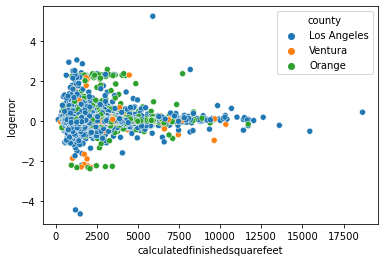

In [20]:
# For a simple visual answer, I'm going to use a scatterplot, with logerror being the value.

sns.scatterplot(x = 'calculatedfinishedsquarefeet', y = 'logerror', data = train, hue = 'county')

In [21]:
# Are there any features that I want to create from the existing data? Any I want to take away?
# First let's check the distributions of the existing cleaned columns:

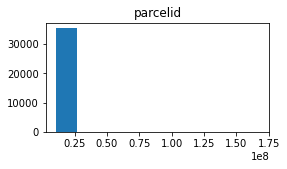

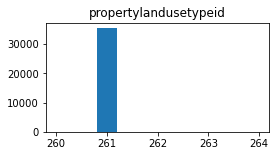

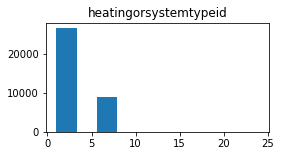

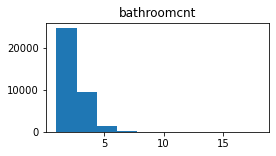

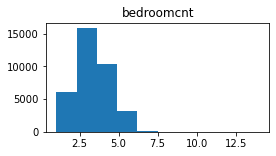

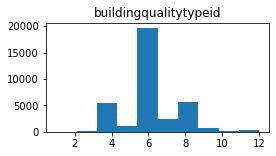

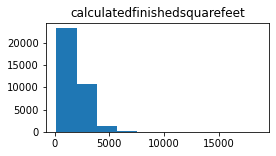

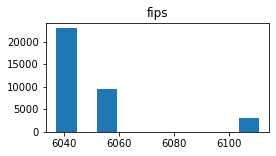

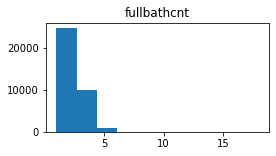

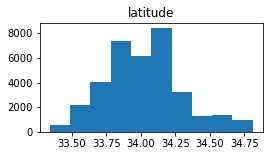

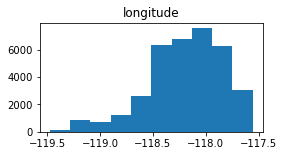

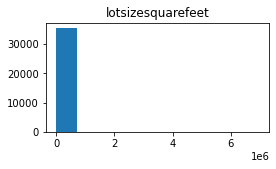

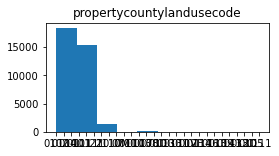

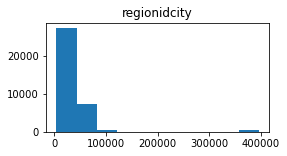

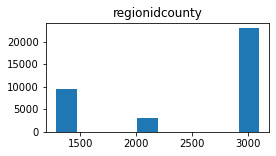

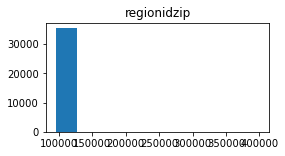

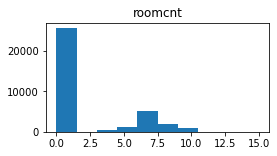

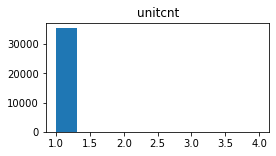

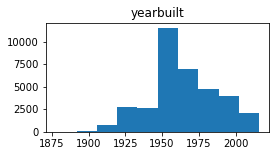

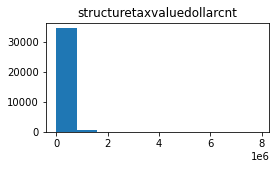

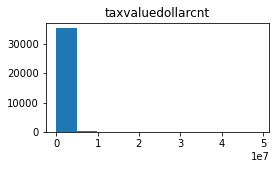

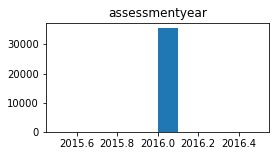

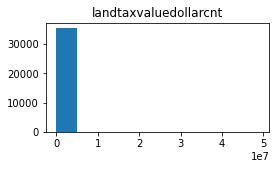

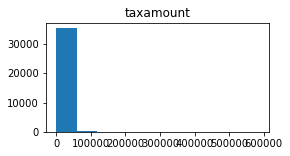

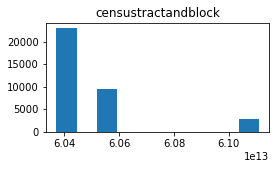

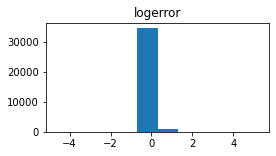

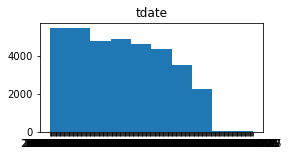

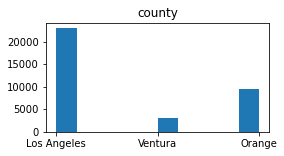

In [22]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

### Questions:

- Do I need to bin anything?
- What is the average tax rate per county?
- combine tax amount and square feet by county and compare
- 

In [27]:
test_df = wrangle.get_zillow_data()
test_df.shape

(77381, 70)

<AxesSubplot:>

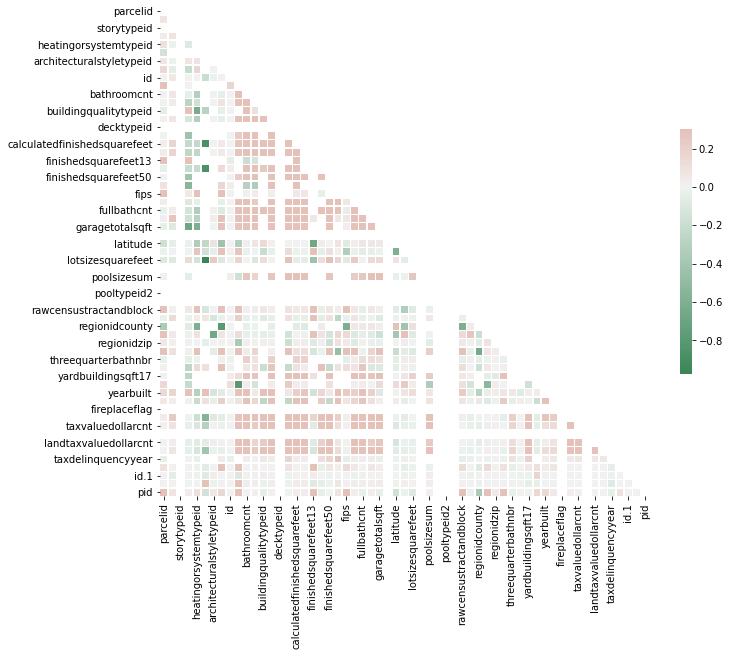

In [28]:
corr = test_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

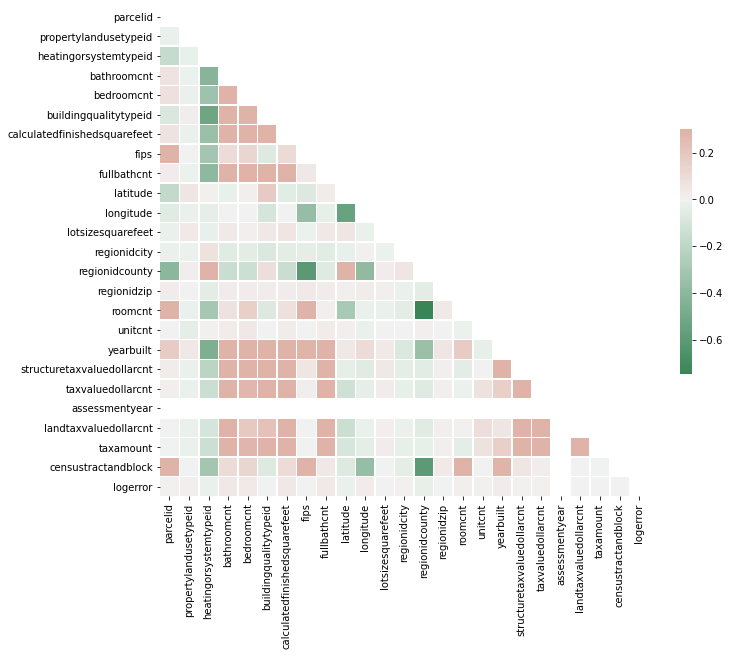

In [29]:
corr = train.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

This correlation matrix usually provides some hints as to which features are statistically correlated to the target variable, ie `logerror` in this case...

<AxesSubplot:xlabel='county', ylabel='logerror'>

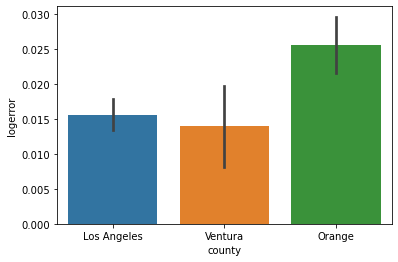

In [30]:
sns.barplot(data = train, x = 'county', y = 'logerror')

In [ ]:
# So log error is higher in orange county...? Interesting.

# What types of houses are predominant in Orange county? Low priced, high priced, normal "family" priced homes?

# Is the model worse at predicting middle income type homes, and better at the outliers?



In [ ]:
# going to try binning the independent variables.
# Trying by using qcut and cut and... there was a third way.



In [ ]:
# Doing what I can remember to do: Clustering. Following the process I learned in class.


